# Ejercicios Pair Programming - Módulo 2 Sprint 2
## Lección 12 - EDA III

Es el momento de hacer una buena exploración visual de los datos para entender un poquito mejor el dataset. Para ello trabajaremos con la librería matplotlib y seaborn.

Hipótesis

Antes de seguir, recordamos las preguntas que nos planteamos al principio del pair programming de EDA para dirigir nuestro análisis.

¿Es Australia es el sitio más peligroso y letal para estar relajada en la playa?

¿Hay diferencias entre los paises en los ataques a hombres y mujeres?

¿Cuáles son las edades que más sufren ataques?

Independientemente de la edad, sufren los hombres más ataques que las mujeres?

¿En qué mes ocurren más ataques?

¿Cuál es la relación entre la especie y el tipo de ataque (si es fatal o no)?

¿Cómo han evolucionado los ataques a lo largo del tiempo?

De todo esto, nos damos cuenta que solo tenemos que limpiar algunas de las columnas, en concreto age, species, country, fatal, year, sex. Reducimos esto a una tabla para saber qué tenemos ya limpito y qué no. Actualizamos esta tabla ya que en el ejercicio de pair de Limpieza I y II ya dejamos algunas columnas limpitas:

variable

¿Está limpia?

age

✔️ la limpiamos en el pair de Limpieza II

species

✔️ la limpiamos en el pair de Limpieza II

country

✔️ la limpiamos en el pair de Limpieza II

fatal

✔️ la limpiamos en el pair de Pandas V

year

✔️ es una columna de tipo float deberíamos convertirla a integer

sex

✔️ la limpiamos en el pair de Pandas V

fecha

✔️ la limpiamos en el pair de Pandas V

In [133]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sidetable
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [134]:
df = pd.read_csv("limpieza2.csv", index_col=0)

In [135]:
df.head(2)

,year,country,activity,age,species_,mes,fatal,sex,especie tiburon,age_ok
0,2018,usa,Paddling,57,White shark,Jun,N,F,White shark,57.0
1,2018,brazil,Swimming,18,Tiger shark,Jun,Y,M,Tiger shark,18.0


Objetivos

En el ejercicio de hoy tendremos que contestar a las siguientes preguntas:

📌 Nota Como siempre, después de cada gráfica incluid una pequeña explicación de lo que nos está mostrando la gráfica.

1.- Estableced el tamaño de las figuras al inicio de vuestro jupyter para que todas tengan las mismas dimensiones.

In [136]:
plt.rcParams["figure.figsize"] = (8,6)

2.- Manos a la obra con los plots, estos irán muy dirigidos hacia las preguntas que queremos contestar, para hacer una primera aproximación a nuestras hipótesis:

¿Cuántos ataques hubo por pais? ¿Se puede ver algo claro si ploteamos todos los paises? En caso de que no, seleccionad solo los 10 paises con más ataques y volved a hacer el plot.

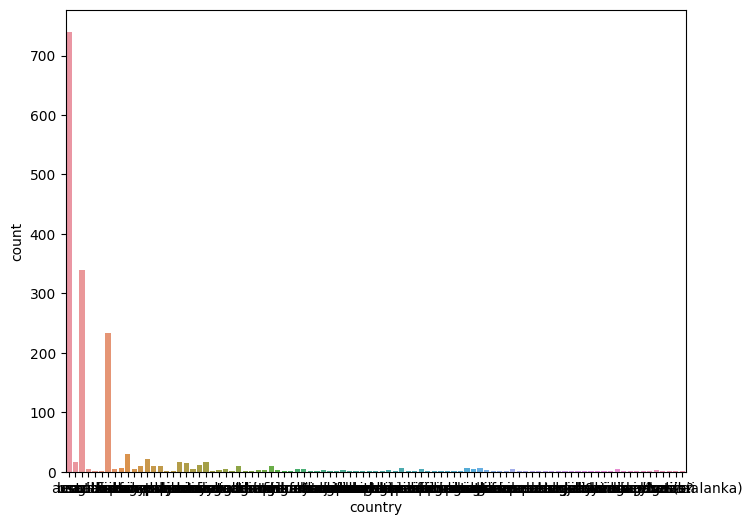

In [158]:
sns.countplot(data=df, x="country");

Si hacemos un countplot para ver todos los ataques en los diferentes países visualizamos que hay muchos países y no se ve claramente ni el país ni el número de ataques.

In [138]:
df.stb.freq(["country"], thresh = 87)

,country,count,percent,cumulative_count,cumulative_percent
0,usa,740,44.659022,740,44.659022
1,australia,340,20.519010,1080,65.178033
2,south africa,234,14.121907,1314,79.299940
3,bahamas,29,1.750151,1343,81.050091
4,new zealand,21,1.267351,1364,82.317441
5,reunion,17,1.025951,1381,83.343392
6,papua new guinea,16,0.965600,1397,84.308992
7,brazil,16,0.965600,1413,85.274593
8,mexico,15,0.905250,1428,86.179843
9,italy,11,0.663850,1439,86.843693


In [139]:
df_paises = df[(df["country"].isin(["usa", "australia", "south africa", "bahamas", "new zealand", "reunion", "papua new guinea", "brazil", "mexico", "italy"]))]

In [140]:
df_paises.head()

,year,country,activity,age,species_,mes,fatal,sex,especie tiburon,age_ok
0,2018,usa,Paddling,57,White shark,Jun,N,F,White shark,57.0
1,2018,brazil,Swimming,18,Tiger shark,Jun,Y,M,Tiger shark,18.0
2,2018,usa,Walking,15,"Bull shark, 6'",May,N,M,Bull shark,15.0
3,2018,australia,Feeding sharks,32,Grey reef shark,May,N,M,Grey shark,32.0
6,2018,australia,Surfing,60,3 m shark,Apr,N,M,Unspecified,60.0


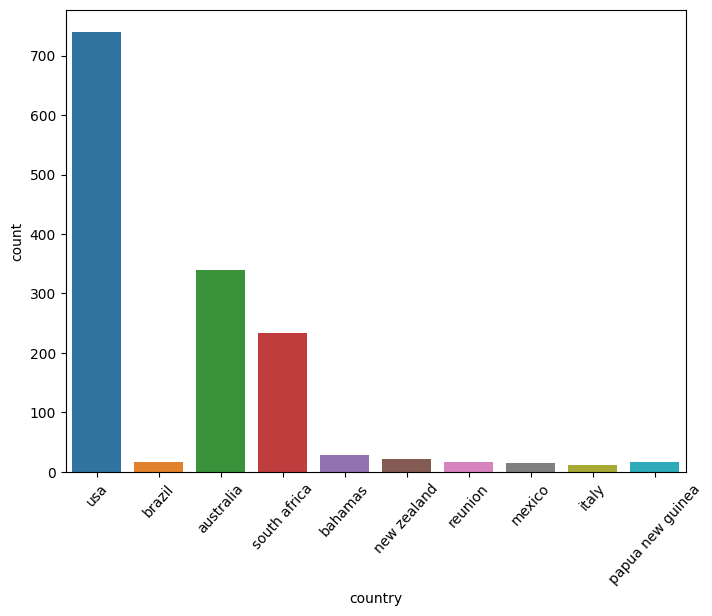

In [157]:
sns.countplot(data=df_paises, x="country")
plt.xticks(rotation=48);

Con esta gráfica de barras visualizamos que el país con más ataques es USA, seguido de Australia y South Africa. Vemos una diferencia bastante importante con el resto de países.

Usando el DataFrame de los 10 paises con más ataques, ¿hay diferencias entre sexos en esos paises?

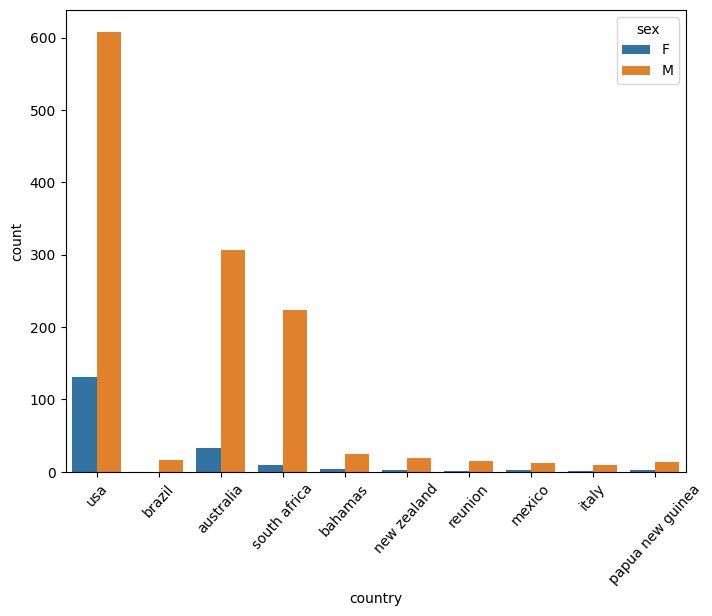

In [156]:
sns.countplot(data=df_paises, x="country", hue="sex")
plt.xticks(rotation=48);

En este gráfico lo que vemos es que la mayoría de los ataques se dan más a hombres en todos los países porque suelen ser los que más actividades acuáticas realizan. 

¿Qué edad recibe mayor número de ataques? 💡 Pista 💡 Para que esta gráfica nos salga legible tendremos que crear antes grupos de edad. Para hacer esto de una forma sencilla tenemos el método pd.cut() que aprendimos en la lección de Limpieza II.

In [143]:
df_paises.head(3)

,year,country,activity,age,species_,mes,fatal,sex,especie tiburon,age_ok
0,2018,usa,Paddling,57,White shark,Jun,N,F,White shark,57.0
1,2018,brazil,Swimming,18,Tiger shark,Jun,Y,M,Tiger shark,18.0
2,2018,usa,Walking,15,"Bull shark, 6'",May,N,M,Bull shark,15.0


In [144]:
df_paises["grupos_edad"] = pd.cut(df_paises["age_ok"], 3, labels=["joven", "adulto", "senior"])

In [145]:
df_paises.head(3)

,year,country,activity,age,species_,mes,fatal,sex,especie tiburon,age_ok,grupos_edad
0,2018,usa,Paddling,57,White shark,Jun,N,F,White shark,57.0,adulto
1,2018,brazil,Swimming,18,Tiger shark,Jun,Y,M,Tiger shark,18.0,joven
2,2018,usa,Walking,15,"Bull shark, 6'",May,N,M,Bull shark,15.0,joven


In [146]:
df_grupos_edad = pd.DataFrame(df_paises.loc[:,["age_ok", "grupos_edad"]])

In [147]:
df_grupos_edad.head()

,age_ok,grupos_edad
0,57.0,adulto
1,18.0,joven
2,15.0,joven
3,32.0,adulto
6,60.0,senior


Visualizando esta tabla que hemos hecho a través de un nuevo dataframe con la agrupación de "age_ok" y "grupos_edad" comprobamos que los rango de edades son:

.- Joven --> 0 - 31 años

.- Adulto --> 32 - 59 años

.- Senior --> 60 años en adelante

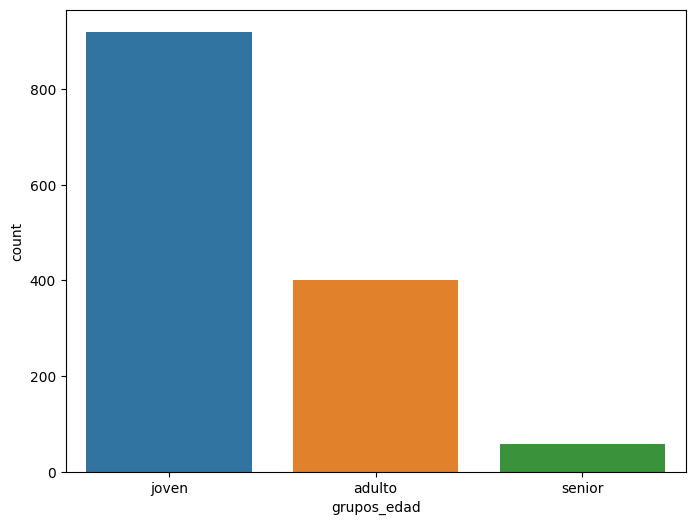

In [159]:
sns.countplot(data=df_paises, x="grupos_edad");

Visualizando esta gráfica de barras vemos que los ataques que más se producen es en el grupo de edad "joven". Este grupo de edad duplica al segundo grupo.

Ataques entre sexos, ¿hay diferencia?

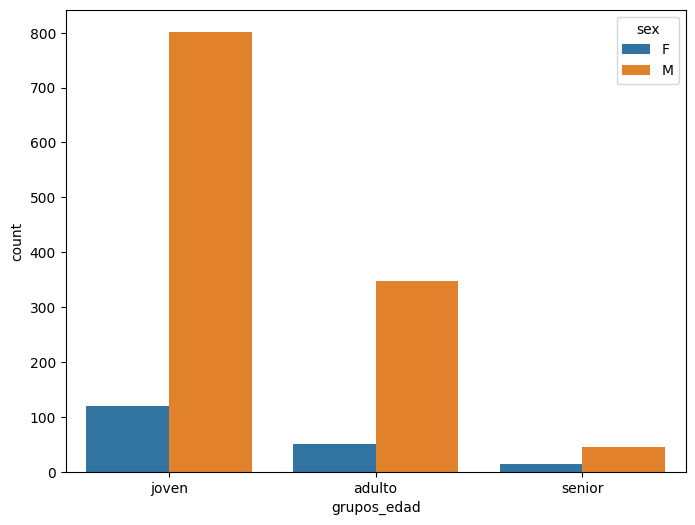

In [160]:
sns.countplot(data=df_paises, x="grupos_edad", hue="sex");

En esta gráfica podemos visualizar que los ataques que más se producen es en los hombres en el grupo de edad "joven". Como hemos comentado antes son los que más actividad acuática realizan.

¿Cuando ocurren más ataques? ¿Os sale algo raro en la gráfica? Intentad limpiar un poco los datos para que os salga mejor.
Podríamos hacer más gráficas para seguir explorando nuestras hipótesis, pero tenemos el tiempo limitado 😢. Aún así, sentiros libres de explorar todo lo que queráis vuestros datos para entenderlos mejor 😉.

In [150]:
df_paises.head(2)

,year,country,activity,age,species_,mes,fatal,sex,especie tiburon,age_ok,grupos_edad
0,2018,usa,Paddling,57,White shark,Jun,N,F,White shark,57.0,adulto
1,2018,brazil,Swimming,18,Tiger shark,Jun,Y,M,Tiger shark,18.0,joven


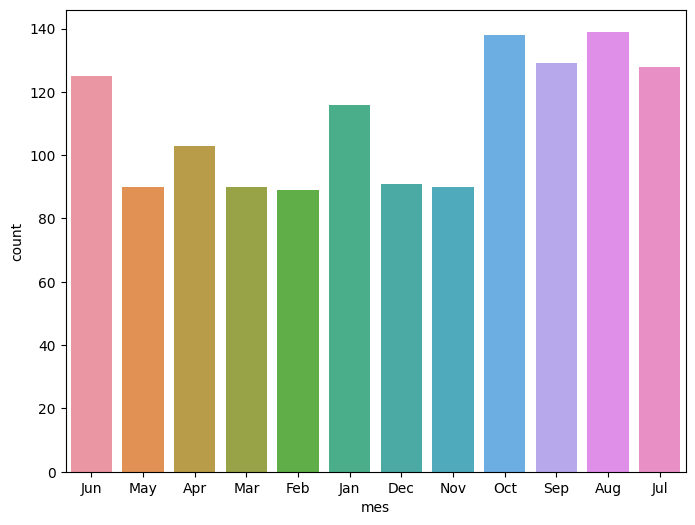

In [161]:
sns.countplot(data=df_paises, x="mes");

En esta gráfica vemos que los meses con más ataques son los más cálidos. 

In [152]:
def estaciones(mes):

    try:
        if mes == "Jan" or mes == "Feb" or mes == "Mar":
            return "Winter"
        elif mes == "Apr" or mes == "May" or mes == "Jun":
            return "Spring"
        elif mes == "Jul" or mes == "Aug" or mes == "Sep":
            return "Summer"
        else:
            return "Autumn"
    except:
        return np.nan

In [153]:
df_paises["estaciones"] = (df_paises["mes"].apply(estaciones))

In [154]:
df_paises.head(2)

,year,country,activity,age,species_,mes,fatal,sex,especie tiburon,age_ok,grupos_edad,estaciones
0,2018,usa,Paddling,57,White shark,Jun,N,F,White shark,57.0,adulto,Spring
1,2018,brazil,Swimming,18,Tiger shark,Jun,Y,M,Tiger shark,18.0,joven,Spring


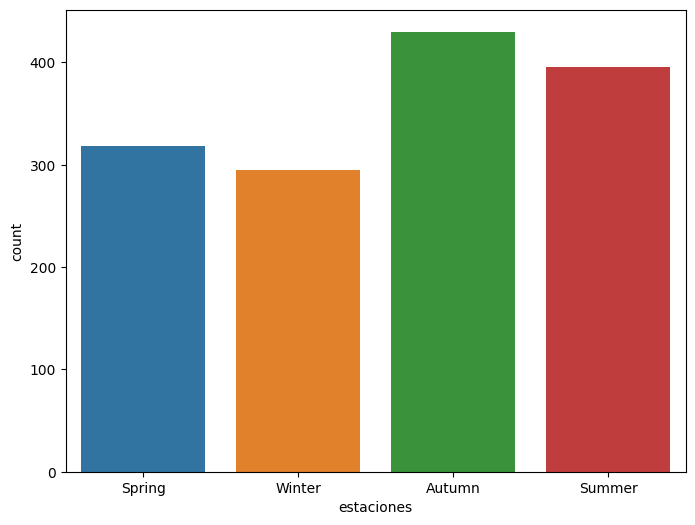

In [162]:
sns.countplot(data=df_paises, x="estaciones");

Visualizando esta gráfica en la que hemos agrupado los meses por estaciones, comprobamos que las estaciones "Autumn" y "Summer" son las que tienen más ataques de tiburones.

Happy coding 🦈